In [16]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 01_도수분포

### 범주형 데이터(카테고리 데이터 등등)의 도수 분포
- 파이썬을 사용하여 범주형 데이터에 대한 도수 분포를 구해본다.

In [18]:
# 물고기 종류 데이터를 읽어온다.
category_data = pd.read_csv('data1/3-3-1-fish-species.csv')
category_data

,species
0,A
1,A
2,A
3,B
4,B
5,B
6,B
7,B
8,B
9,B


In [20]:
# value_counts 메서드를 통해 도수분포를 확인할 수 있다
# 도수를 기준으로 정렬된다.
category_data['species'].value_counts()

species
B    7
A    3
Name: count, dtype: int64

In [22]:
# 만약 도수를 기준으로 정렬하고 싶지 않다면
# sort에 False를 넣어준다.
category_data['species'].value_counts(sort=False)

species
A    3
B    7
Name: count, dtype: int64

- 도수 분포를 확인한 결과 A가 3 마리이고, B는 7 마리이다

# 도수 분포를 확인한 결과 A가 3 마리이고, B는 7 마리이다

|종류|마리수|
|---|---|
|A|3|
|B|7|

In [24]:
d1 = {
    '종류' : ['A', 'B'],
    '마리수' : [3, 7]
}
pd.DataFrame(d1)

,종류,마리수
0,A,3
1,B,7


### 수치형 데이터에 대한 도수 분포

In [26]:
# 물고기의 몸 길이가 기록된 데이터
numeric_data = pd.read_csv('data1/3-3-2-fish-length.csv')
numeric_data

,length
0,1.91
1,1.21
2,2.28
3,1.01
4,1.00
5,4.50
6,1.96
7,0.72
8,3.67
9,2.55


In [28]:
# 도수 분포를 구한다.
numeric_data['length'].value_counts()

length
1.91    1
1.21    1
2.28    1
1.01    1
1.00    1
4.50    1
1.96    1
0.72    1
3.67    1
2.55    1
Name: count, dtype: int64

In [30]:
# value_counts의 bins 이라는 매개변수를 사용하면 계급을 나눌 수 있다.
# 3분할
# 하한은 포함하지 않고 상한은 포함한다.
numeric_data['length'].value_counts(bins=3)

(0.715, 1.98]    6
(1.98, 3.24]     2
(3.24, 4.5]      2
Name: count, dtype: int64

- 0.715 초과 ~ 1.98 이하가 6개
- 1.98 초과 ~ 3.24 이하가 2개
- 3.24 초과 ~ 4.5 이하가 2개

In [32]:
# 범위를 직접 지정할 수 있다.
freq = numeric_data['length'].value_counts(bins=[0, 1, 2, 3, 4, 5], sort=False)
freq

(-0.001, 1.0]    2
(1.0, 2.0]       4
(2.0, 3.0]       2
(3.0, 4.0]       1
(4.0, 5.0]       1
Name: count, dtype: int64

- -0.001 초과 ~ 1.0 이하가 2개
- 1.0 초과 ~ 2.0 이하가 4개
- 2.0 초과 ~ 3.0 이하가 2개
- 3.0 초과 ~ 4.0 이하가 1개
- 4.0 초과 ~ 5.0 이하가 1개

In [34]:
# np.histogram 함수를 사용하여 도수 분포를 구한다.
np.histogram(numeric_data['length'], bins=3)

(array([6, 2, 2], dtype=int64), array([0.72, 1.98, 3.24, 4.5 ]))

- 0.72 이상 ~ 1.98 미만이 6개
- 1.98 이상 ~ 3.24 미만이 2개
- 3.24 이상 ~ 4.5 이하가 2개

In [36]:
# 범위를 직접 지정
np.histogram(numeric_data['length'], bins=[0, 1, 2, 3, 4, 5])

(array([1, 5, 2, 1, 1], dtype=int64), array([0, 1, 2, 3, 4, 5]))

- 0 이상 ~ 1 미만 : 1개
- 1 이상 ~ 2 미만 : 5개
- 2 이상 ~ 3 미만 : 2개
- 3 이상 ~ 4 미만 : 1개
- 4 이상 ~ 5 이하 : 1개

### 02_상대도수분포와 누적도수분포

# 위에서 계산한 물고기의 몸길이 데이터의 도수를 확인한다.
freq

In [38]:
# 도수를 표본의 개수로 나눠 상대 도수를 구한다.
rel_freq = freq / len(numeric_data['length'])
rel_freq

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.4
(2.0, 3.0]       0.2
(3.0, 4.0]       0.1
(4.0, 5.0]       0.1
Name: count, dtype: float64

In [40]:
# value_counts 함수를 사용할 때 normalize 에 True를 넣어주면
# 상대 도수를 구해준다.
numeric_data['length'].value_counts(bins=[0, 1, 2, 3, 4, 5], sort=False, normalize=True)

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.4
(2.0, 3.0]       0.2
(3.0, 4.0]       0.1
(4.0, 5.0]       0.1
Name: proportion, dtype: float64

In [42]:
# numpy를 사용한다면 histogram 함수의 density를 True로 설정하면 상대도수를 구할 수 있다.
np.histogram(numeric_data['length'], bins=[0, 1, 2, 3, 4, 5], density=True)

(array([0.1, 0.5, 0.2, 0.1, 0.1]), array([0, 1, 2, 3, 4, 5]))

- 주의할점
- pandas와 numpy 모두 도수 분포를 구할 수 있다는 것은 같다.
- 허나 pandas는 하한을 포함하지 않고 상한을 포함한다.
- numpy는 하한을 포함하고 상한을 포함하지 않으며 제일 마지막 것만 상한 하한을 모두 포함한다.
- 이 때문에 결과에 차이가 있을 수 있다.

### 누적 도수 분포

In [44]:
# 도수를 구하고 cumsum 함수를 호출하면 누적 도수를 구할 수 있다.
display(freq)
freq.cumsum()

(-0.001, 1.0]    2
(1.0, 2.0]       4
(2.0, 3.0]       2
(3.0, 4.0]       1
(4.0, 5.0]       1
Name: count, dtype: int64

(-0.001, 1.0]     2
(1.0, 2.0]        6
(2.0, 3.0]        8
(3.0, 4.0]        9
(4.0, 5.0]       10
Name: count, dtype: int64

In [46]:
# numpy를 사용할 경우 도수를 구하면 결과가
# 도수와 각 구간을 나타내는 행렬이 모두 반환된다.
# 여기에서 첫 번째인 도수만을 가지고 상대 도수를 구하면 된다.
a1 = np.histogram(numeric_data['length'], bins=[0, 1, 2, 3, 4, 5])
display(a1[1])
display(np.cumsum(a1[0]))

array([0, 1, 2, 3, 4, 5])

array([ 1,  6,  8,  9, 10], dtype=int64)

In [48]:
# 상대 도수를 이용해 누적값을 계산하면 누적상대도수분포를 구할 수 있다.
# 누적상대도수분포
rel_freq.cumsum()

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.6
(2.0, 3.0]       0.8
(3.0, 4.0]       0.9
(4.0, 5.0]       1.0
Name: count, dtype: float64

### 03_히스토그램

In [50]:
# seaborn에서 제공하는 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

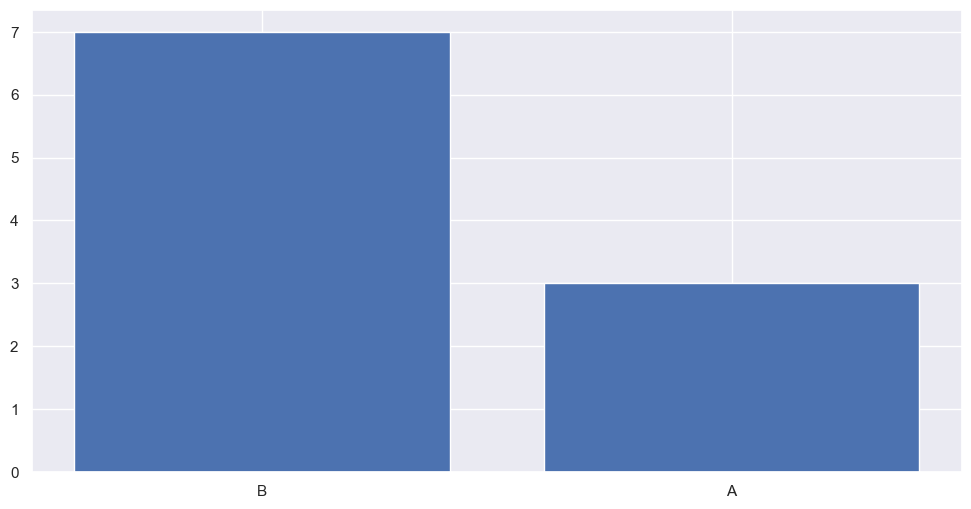

In [52]:
# 범주형 데이터에 대한 도수 시각화
# matplotlib 사용

# 도수를 구한다.
a1 = category_data['species'].value_counts()
# 막대 그래프를 그린다.
plt.bar(a1.index, a1.values)
plt.show()

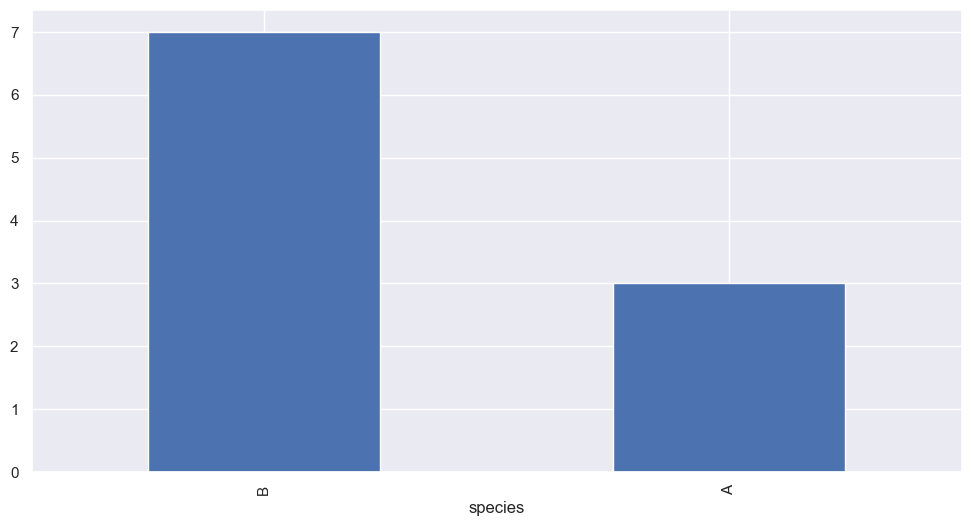

In [54]:
# pandas를 이용한 시각화
# 도수를 구한다.
a1 = category_data['species'].value_counts()
# 그린다.
# Series를 통해 막대 그래프를 그리면 index가 x 축, 값이 y 축이 된다.
a1.plot.bar()
plt.show()

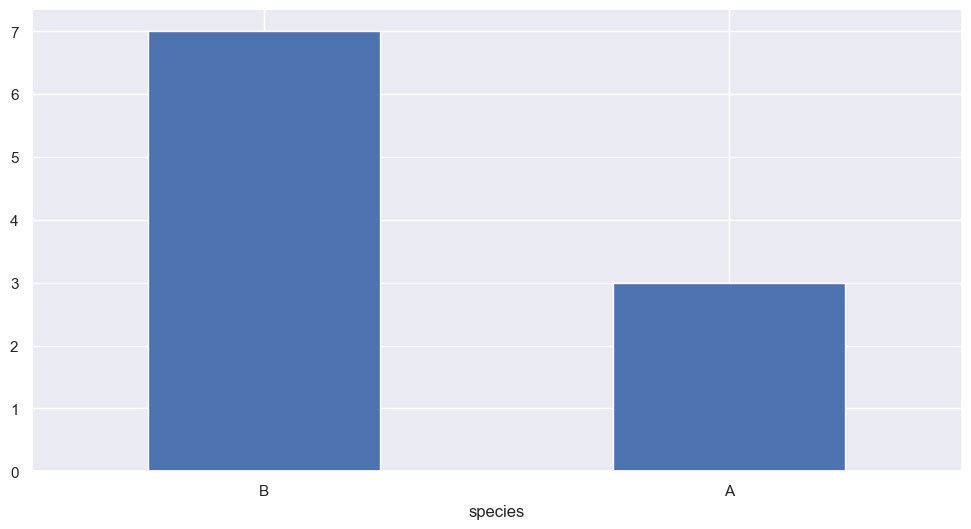

In [56]:
# pandas를 이용한 시각화
# 도수를 구한다.
a1 = category_data['species'].value_counts()
# 그린다.
# Series를 통해 막대 그래프를 그리면 index가 x 축, 값이 y 축이 된다.
a1.plot.bar()

# x 축 눈금 문자열을 회전시킨다.
plt.xticks(rotation=0)

plt.show()

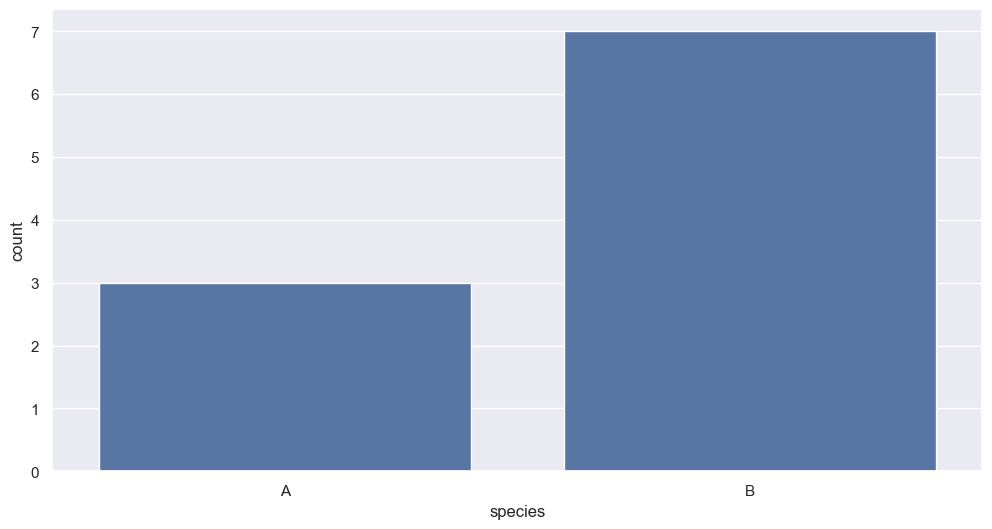

In [58]:
# seaborn을 이용한 시각화
# data 에 DataFrame을 설정하고 x 에는 x축에 적용할 컬럼명, 
# y에는 y 축에 적용할 컬럼명을 작성해준다.
# counter plot : 도수를 직접 구해서 그래프를 그려준다.
sns.countplot(data=category_data, x='species')
plt.show()

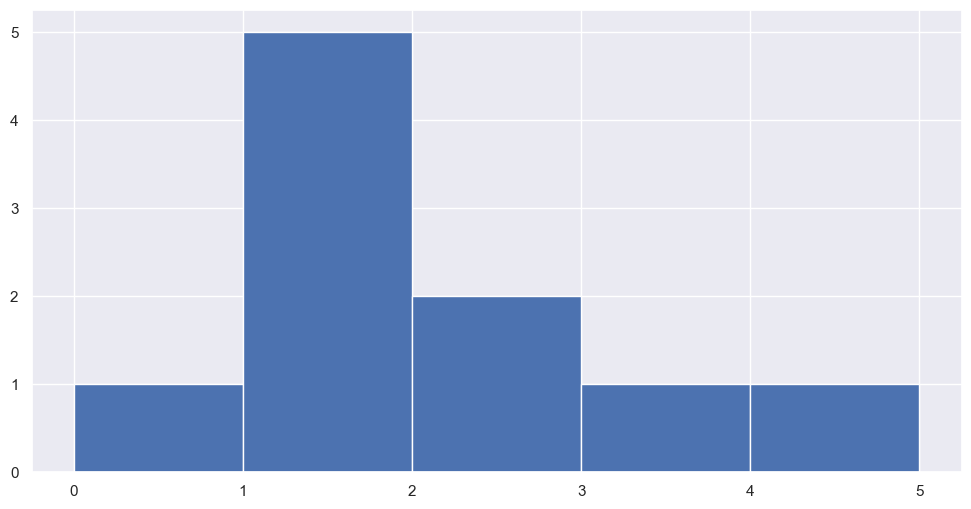

In [60]:
# 수치형 데이터를 통한 시각화
# matplotlib를 통한 히스토그램
# bins : 구간의 개수. 기본이 10개. 만약 리스트로 넣어주면 상한과 하한을 설정해서 그릴 수 있다.
# plt.hist(data=numeric_data, x='length', bins=20)
plt.hist(data=numeric_data, x='length', bins=[0, 1, 2, 3, 4, 5])
plt.show()

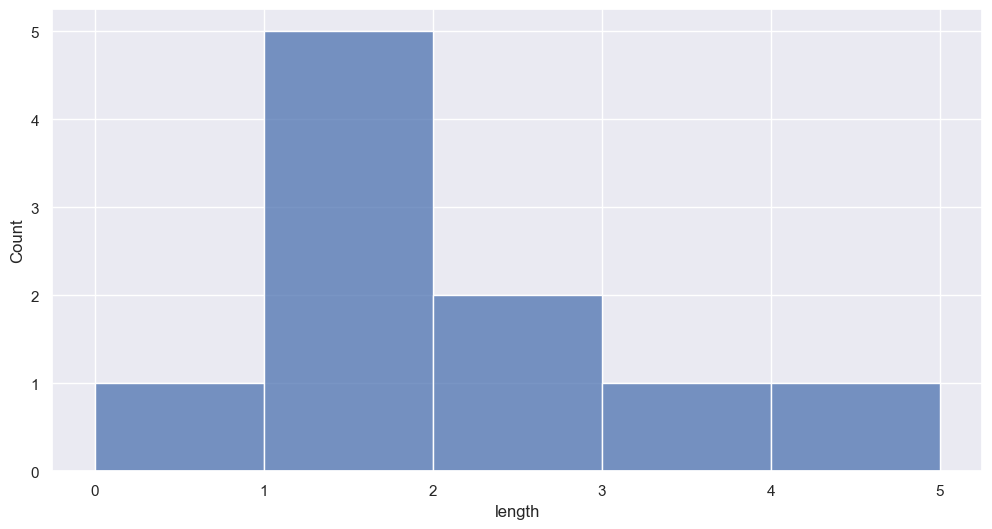

In [62]:
# seaborn 사용
# bins : 구간의 개수. 기본은 데이터의 범위를 기반으로 자동으로 설정해준다.
# 만약 리스트로 넣어주면 상한과 하한을 설정하는 것이된다.
# sns.histplot(data=numeric_data, x='length')
# sns.histplot(data=numeric_data, x='length', bins=10)
sns.histplot(data=numeric_data, x='length', bins=[0, 1, 2, 3, 4, 5])
plt.show()

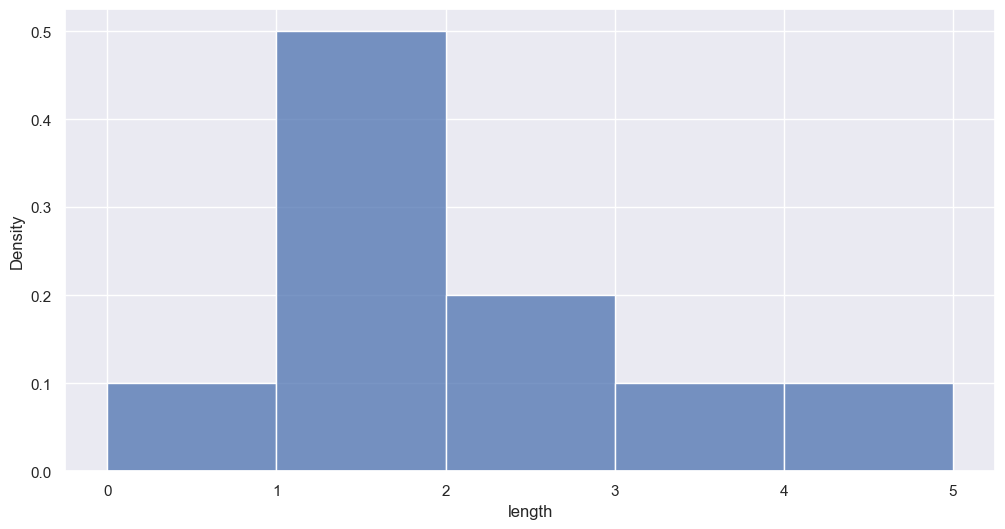

In [59]:
# seaborn은 stat 에 density를 넣어주면 상대도수를 구해 히스토그램을 그려준다
sns.histplot(data=numeric_data, x='length', bins=[0, 1, 2, 3, 4, 5], stat='density')
plt.show()

### 계급의 폭이 다른 히스토그램

In [61]:
# 지금까지는 계급의 폭이 항상 같도록 bins를 설정하였습니다
# [0, 1, 2, 3, 4, 5] : 각 1씩
# 그러나 계급의 폭은 임의로 설정할 수 있으며 각 계급의 폭이 서로 다를 수도 있다.
# 각 계급의 폭에 맞게 도수를 구할수 있다. 이 때, 상대 도수 분포를 구해야만
# 정상적으로 확인이 가능하다
# 0 ~ 1 (계급의 폭 1) : 0.1
# 1 ~ 2 (계급의 폭 1) : 0.5
# 2 ~ 5 (계급의 폭 3) : 0.133333333 X 3
# 이렇게 해서 총 합이 1.0이 된다.
np.histogram(numeric_data['length'], bins=[0, 1, 2, 5], density=True)

(array([0.1       , 0.5       , 0.13333333]), array([0, 1, 2, 5]))

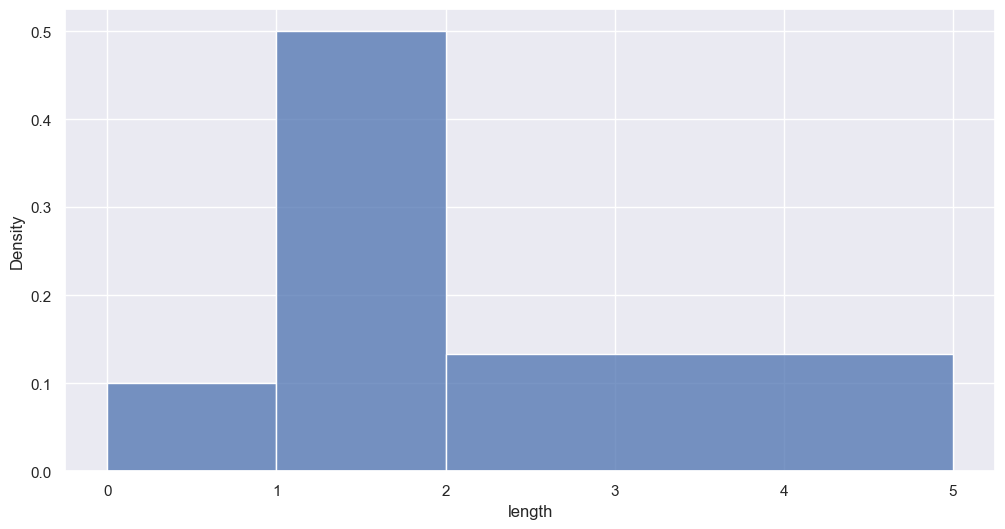

In [64]:
# 0 ~ 1, 1 ~ 2 는 계급의 폭이 1이고 2 ~ 5는 계급의 폭이 3이다
# 상대 도수를 구하면 0 ~ 1 은 0.1 이고 1 ~ 2는 0.5, 2 ~ 5 는 0.4이다.
# 2 ~ 5는 계급의 폭이 3이므로 0.4를 3으로 나눠 2 ~ 3, 3  ~ 4, 4 ~ 5 구간을 표현한다.
sns.histplot(data=numeric_data, x='length', bins=[0, 1, 2, 5], stat='density')
plt.show()

### 04_커널밀도추정

### 04_커널밀도추정

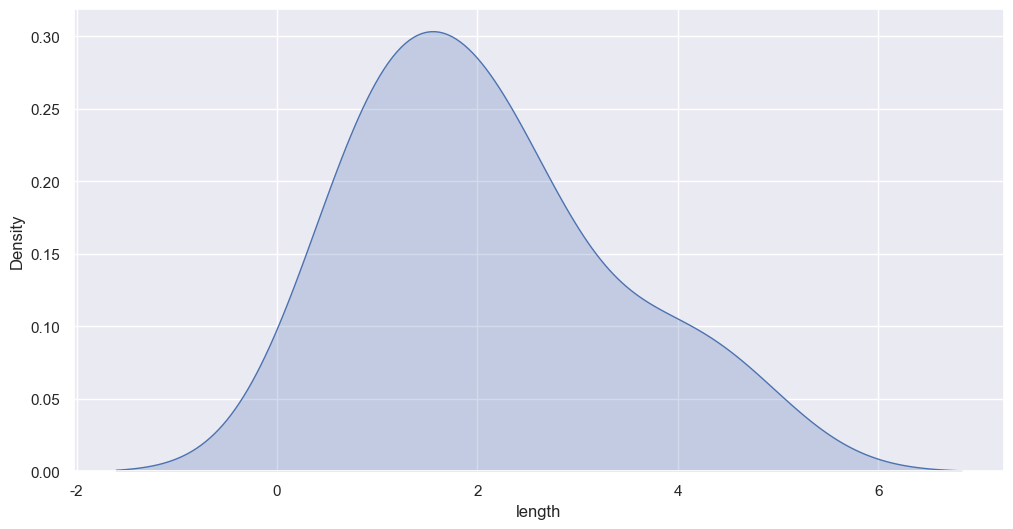

In [66]:
# kdeplot 함수를 사용하면 커널 밀도 추정 수치를 시각화 할 수 있다
# 히스토그램 보다는 부드러운 결과를 얻을 수 있다.
# 함지만 몸길이 데이터인데도 음수 영역에서 0보다 큰 밀도가 나타난다.
# 0 이상만 존재하는 데이터나 이산형 데이터에 대해서는 커널밀도 추정을 실행하면 직관적인
# 결과를 얻을 수 없는 일도 있다.(실제 데이터 값의 분포와 다를 수 있다)
# 이럴때는 히스토그램을 사용해야 한다.
sns.kdeplot(data=numeric_data, x='length', fill=True)
plt.show()

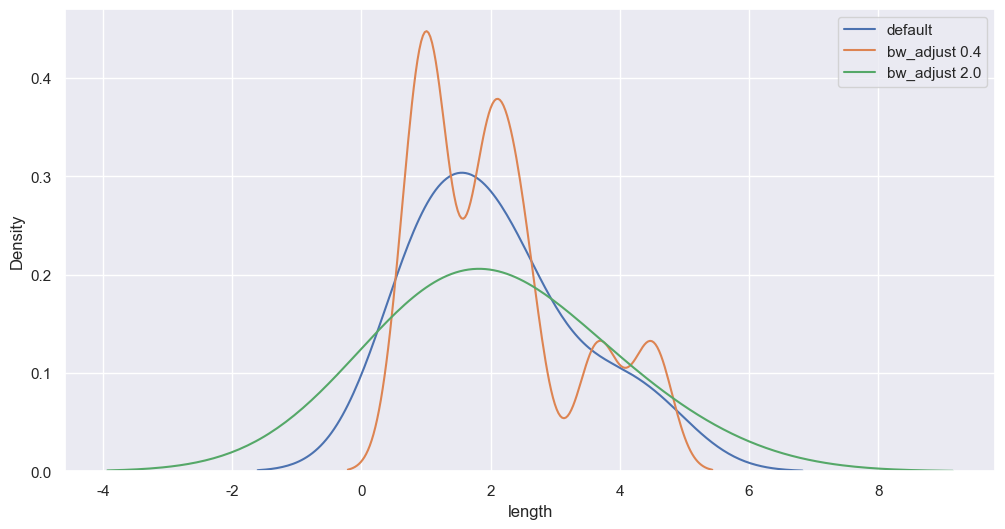

In [68]:
# kde의 폭(밴드 폭)을 변경한다.
# bw_adjust를 줄이면 변동이 커진다.
# 반대로 bw_adjust를 늘리면 부드러운 결과를 얻을 수가 있다.
# kde는 x 축의 눈금을 토대로 정확한 수치를 확인한다기 보다는
# 데이터의 분포를 확인하는 정도로만 사용한다.
sns.kdeplot(data=numeric_data, x='length', label='default')
sns.kdeplot(data=numeric_data, x='length', bw_adjust=0.4, label='bw_adjust 0.4')
sns.kdeplot(data=numeric_data, x='length', bw_adjust=2.0, label='bw_adjust 2.0')
plt.legend()
plt.show()